### BANK MARKETING

* C SOMA SEKHAR GOUD
* Batch.No: DS2307

In [61]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
df = pd.read_csv('termdeposit_train.csv')
df_test =pd.read_csv('termdeposit_test.csv')

In [63]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [124]:
df_test.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,15,may,119,4,372,3,failure


### Data Exploration and Analysis

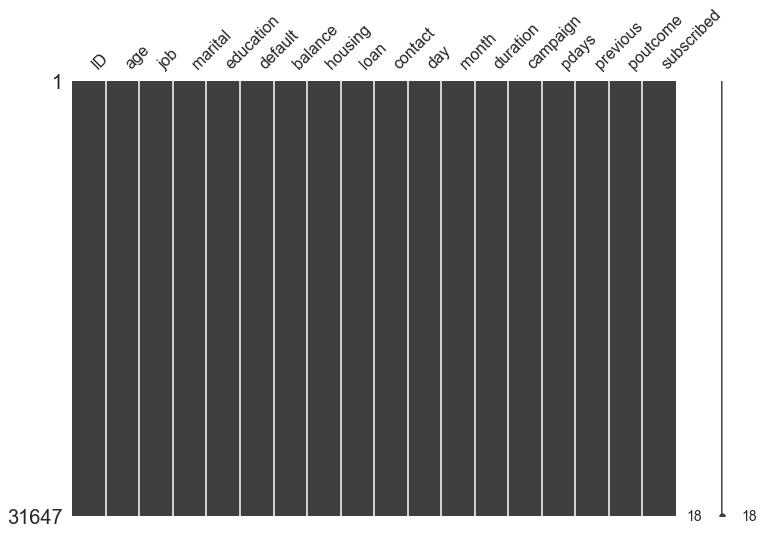

In [65]:
# Visualize null values using missingno in train data
msno.matrix(df, figsize=(12, 8))
plt.show()

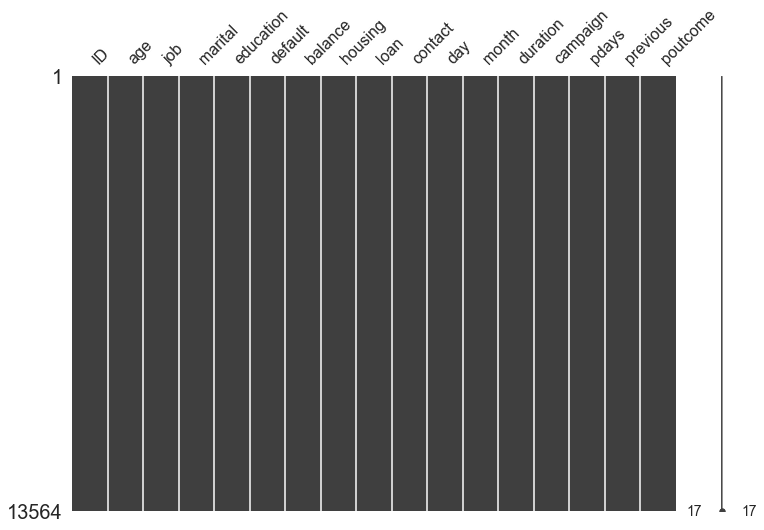

In [66]:
# Visualize null values using missingno in test data
msno.matrix(df_test, figsize=(12, 8))
plt.show()

* No null values

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [68]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


> * Identify categorical features

In [69]:
categorical_features = df.select_dtypes(include=['object']).columns

# Display unique values for each categorical feature
for feature in categorical_features:
    unique_values = df[feature].unique()
    print(f'{feature}: {unique_values}')


job: ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital: ['married' 'divorced' 'single']
education: ['unknown' 'secondary' 'tertiary' 'primary']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['telephone' 'cellular' 'unknown']
month: ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome: ['unknown' 'success' 'failure' 'other']
subscribed: ['no' 'yes']


In [70]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Display unique values and counts for each categorical feature
for feature in categorical_features:
    unique_values_counts = df[feature].value_counts()
    print(f'{feature}:')
    for value, count in unique_values_counts.items():
        print(f'  {value}: {count}')
    print('\n')


job:
  blue-collar: 6842
  management: 6639
  technician: 5307
  admin.: 3631
  services: 2903
  retired: 1574
  self-employed: 1123
  entrepreneur: 1008
  unemployed: 905
  housemaid: 874
  student: 635
  unknown: 206


marital:
  married: 19095
  single: 8922
  divorced: 3630


education:
  secondary: 16224
  tertiary: 9301
  primary: 4808
  unknown: 1314


default:
  no: 31062
  yes: 585


housing:
  yes: 17584
  no: 14063


loan:
  no: 26516
  yes: 5131


contact:
  cellular: 20423
  unknown: 9177
  telephone: 2047


month:
  may: 9669
  jul: 4844
  aug: 4333
  jun: 3738
  nov: 2783
  apr: 2055
  feb: 1827
  jan: 977
  oct: 512
  sep: 410
  mar: 342
  dec: 157


poutcome:
  unknown: 25929
  failure: 3362
  other: 1288
  success: 1068


subscribed:
  no: 27932
  yes: 3715




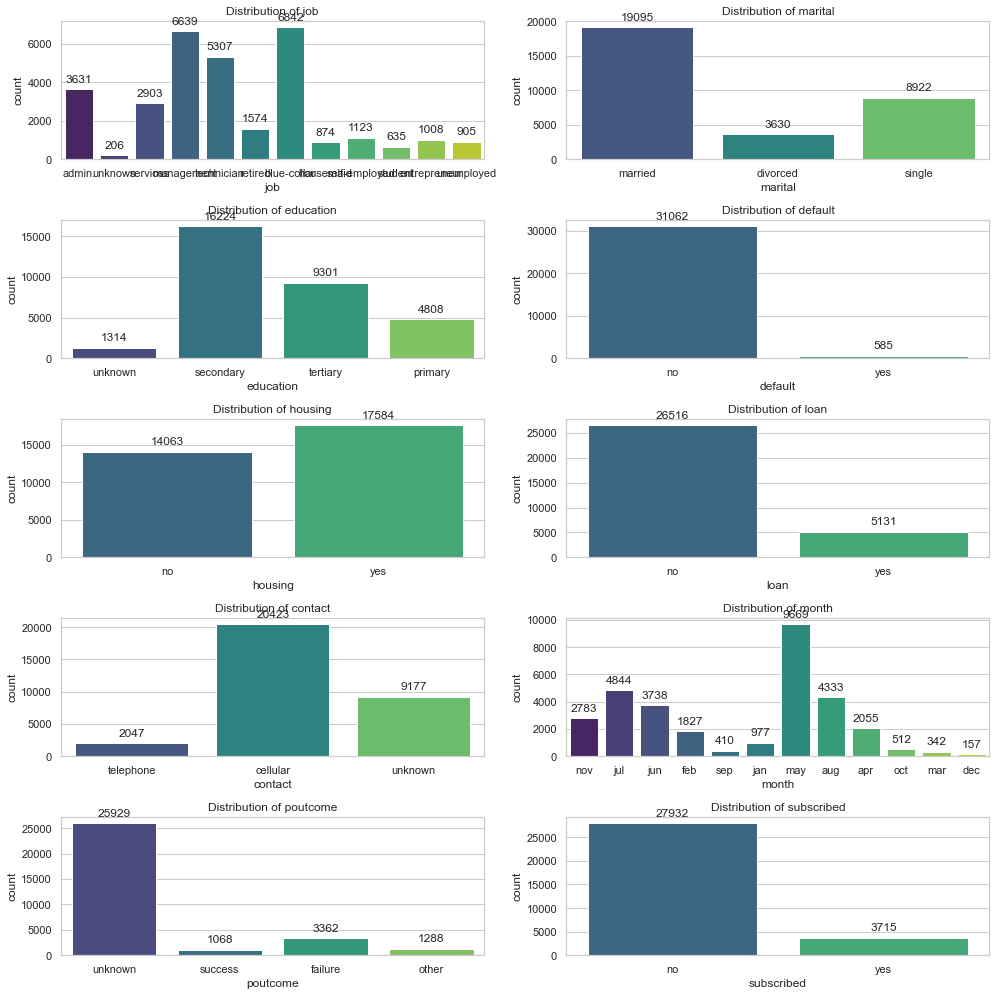

In [71]:
# Set the style for the plots
sns.set(style="whitegrid")

# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(categorical_features) // 2, ncols=2, figsize=(14, 14))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Visualize categorical features with count values
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, palette="viridis", ax=axes[i])
    
    # Add count values on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()


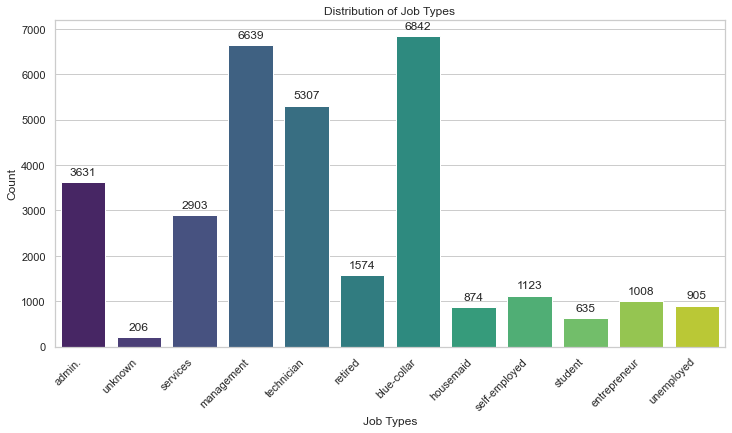

In [72]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a distribution plot for the "job" column
plt.figure(figsize=(12, 6))
sns.countplot(x="job", data=df, palette="viridis")
plt.title('Distribution of Job Types')
plt.xlabel('Job Types')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add count values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

 The above charts give brief overview of attributes, there types and total count
* In job types blue_collar, managment are the most accupied positions
Like-wise we get a breif understanding on total data

In [73]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

> * We will drop 'ID' column which is not required

In [74]:
df = df.drop(columns=['ID'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


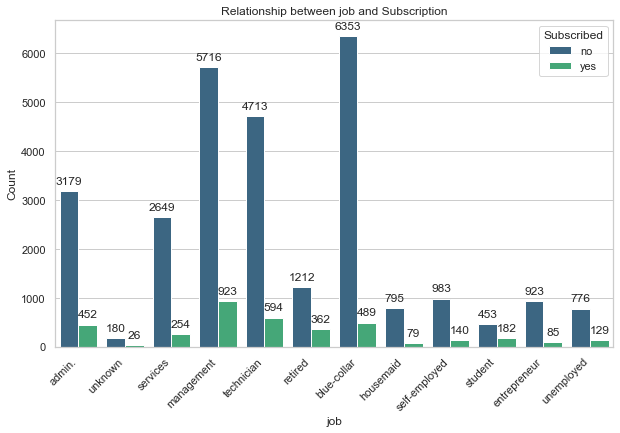

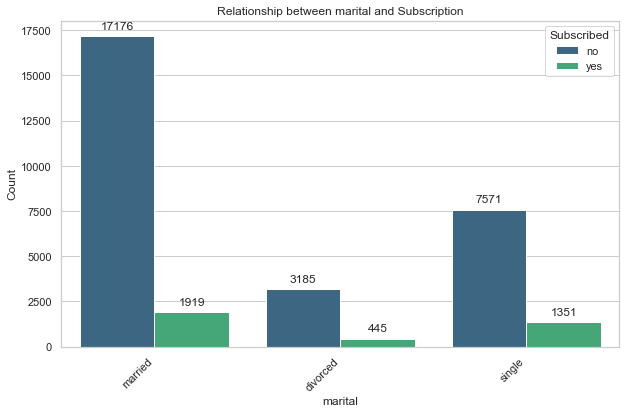

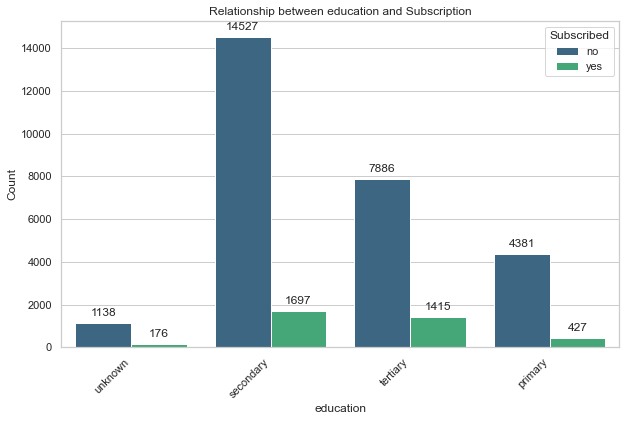

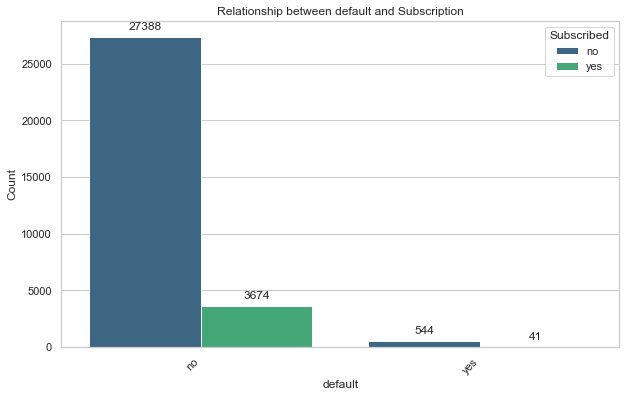

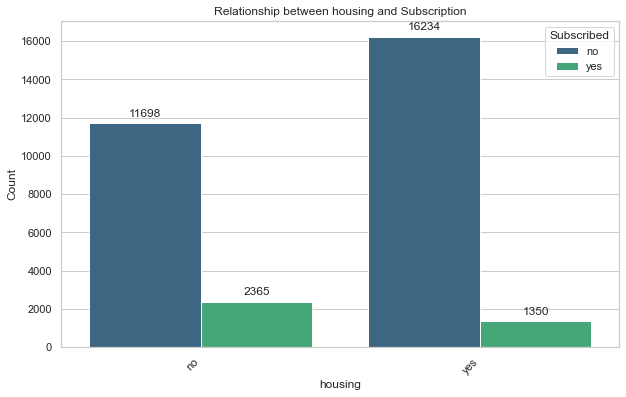

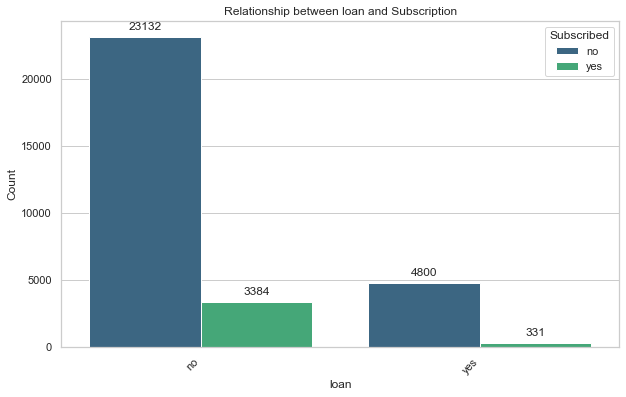

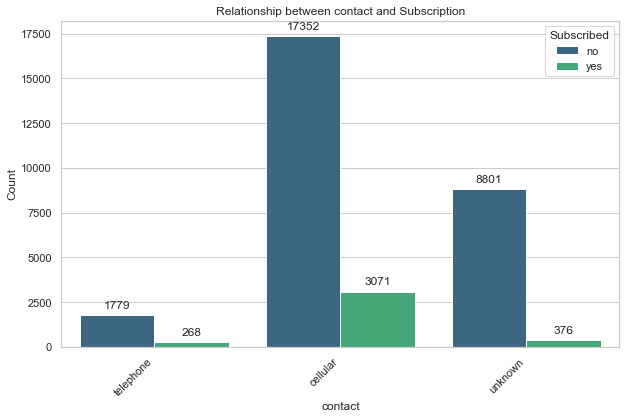

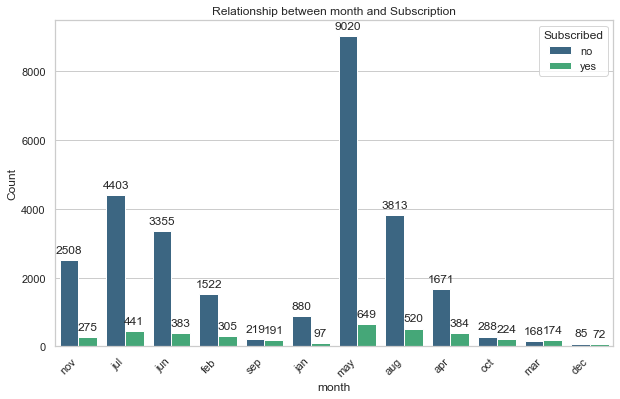

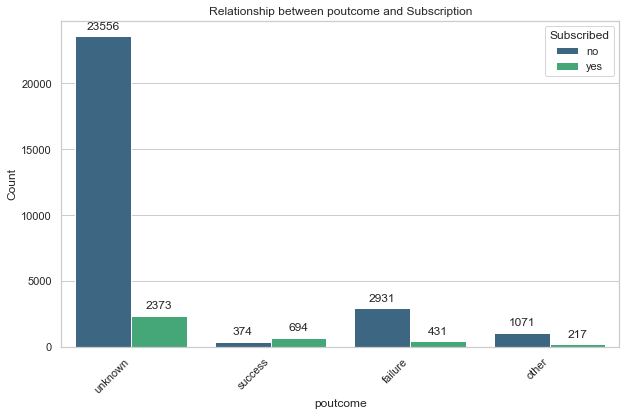

In [75]:
# Set the style for the plot
sns.set(style="whitegrid")

# Select categorical features (excluding the target variable)
categorical_features = df.drop(columns=['subscribed']).select_dtypes(include=['object']).columns

# Create stacked bar plots for the relationship between "subscribed" and other categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='subscribed', data=df, palette="viridis")
    plt.title(f'Relationship between {feature} and Subscription')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Subscribed', loc='upper right')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    
    # Add count values on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()

* Job and Subscription:

Clients with jobs in certain categories, such as "blue color, managment,technician," tend to have a higher subscription rate.

On the other hand, clients with jobs in categories like "Unemployed" may have a lower subscription rate.


* Marital Status and Subscription:

Marital status seems to have some influence on subscription, with married clients showing a different pattern compared to single or divorced clients.


* Education and Subscription:

Clients with a level of education, such as "Secondary," exhibit a higher subscription rate.


* Default, Housing, and Personal Loan Status and Subscription:

Clients without credit default, without housing loans, and without personal loans are more likely to subscribe to a term deposit.


* Contact Type and Subscription:

The type of communication method used seems to impact subscription rates.


In [76]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Display unique values and summary statistics for each numerical feature
for feature in numerical_features:
    summary_stats = df[feature].describe()
    
    print(f'{feature}:')
    print(f'  Summary Statistics:')
    print(summary_stats)
    print('\n')



age:
  Summary Statistics:
count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


balance:
  Summary Statistics:
count     31647.000000
mean       1363.890258
std        3028.304293
min       -8019.000000
25%          73.000000
50%         450.000000
75%        1431.000000
max      102127.000000
Name: balance, dtype: float64


day:
  Summary Statistics:
count    31647.000000
mean        15.835466
std          8.337097
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


duration:
  Summary Statistics:
count    31647.000000
mean       258.113534
std        257.118973
min          0.000000
25%        104.000000
50%        180.000000
75%        318.500000
max       4918.000000
Name: duration, dtype: float64


campaign:
  Summary Statistics:
count    31647.000

In [77]:
# Identify discrete features based on unique value counts
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 20]

# Identify continuous features based on unique value counts
continuous_features = [feature for feature in numerical_features if len(df[feature].unique()) >= 20]

print(f'Potential Discrete Features: {discrete_features}')
print(f'Potential Continuous Features: {continuous_features}')

Potential Discrete Features: []
Potential Continuous Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


> So we have 
 * Discrete Features: 0
 * Continuous Features:7

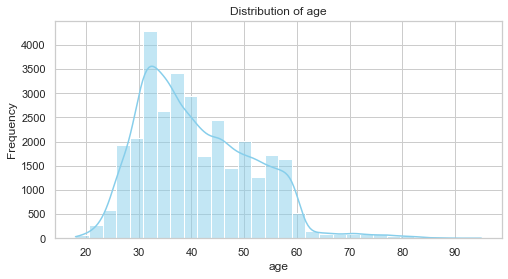

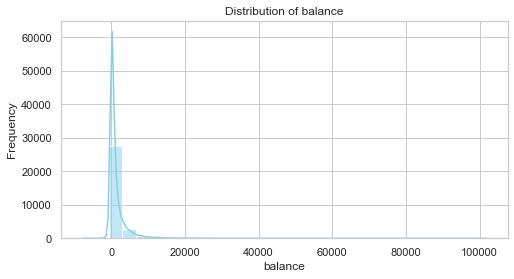

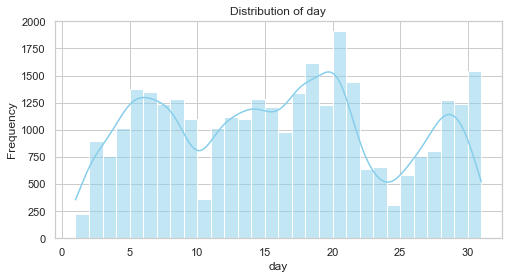

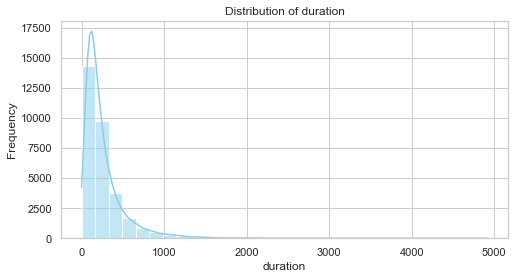

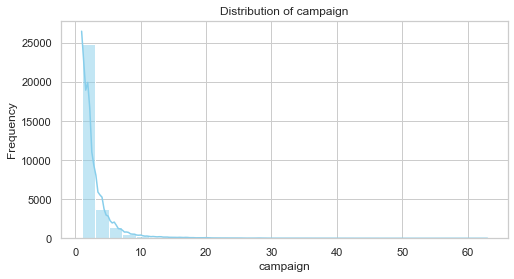

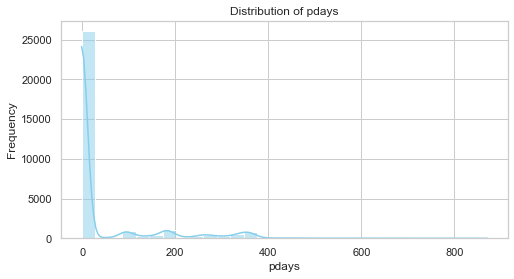

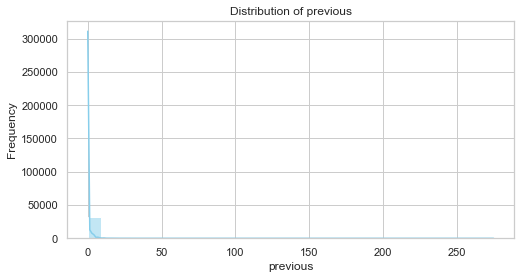

In [78]:
# Distribution of Continuous numerical Features
# Set the style for the plots
sns.set(style="whitegrid")


# Create distribution plots for potential continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

> Apart from age, day the rest are skewed towards left.

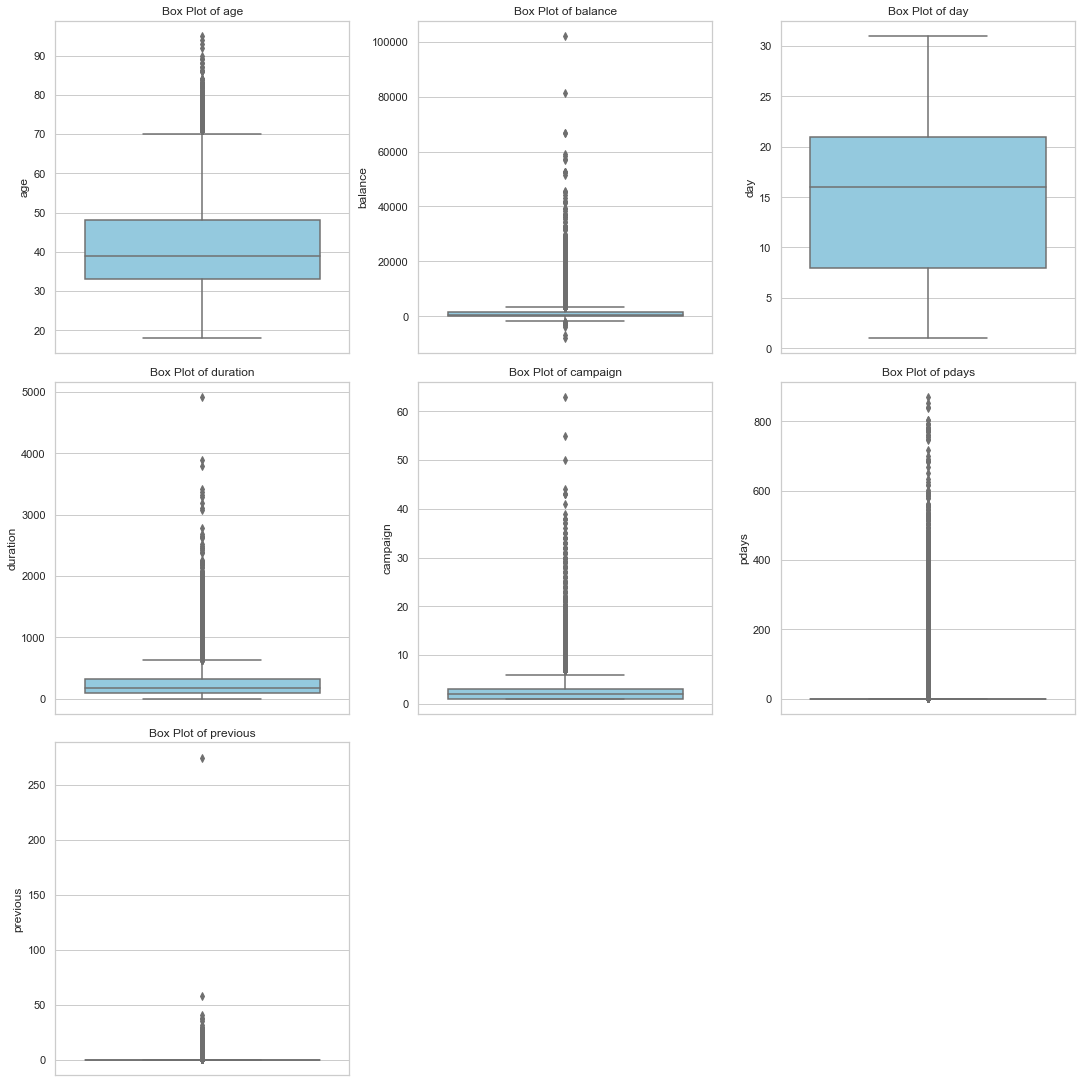

In [79]:
# Set the style for the plots
sns.set(style="whitegrid")

# Identify potential continuous features based on unique value counts
potential_continuous_features = [feature for feature in df.select_dtypes(include=['number']).columns if len(df[feature].unique()) >= 20]

# Calculate the number of rows and columns for the subplot grid
num_features = len(potential_continuous_features)
num_cols = min(3, num_features)  # Set a maximum of 3 columns
num_rows = (num_features - 1) // num_cols + 1

# Figure size
plt.figure(figsize=(15, 5 * num_rows))

# Create individual box plots for each potential continuous feature
for i, feature in enumerate(potential_continuous_features):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplots dynamically
    sns.boxplot(data=df, y=feature, color='skyblue')
    plt.title(f"Box Plot of {feature}")

# Adjust the layout
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=1.0)
plt.show()

The "balance" feature exhibits a wide range of values, with a noticeable number of outliers on the higher end. 

* Except for 'day' rest are having outliers and we are not going to remove for age

> Removing outliers using IQR Method

In [101]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, feature, threshold):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Specify individual thresholds for each feature
individual_thresholds = {
    'balance': 50000,
    'duration': 3000,
    'campaign': 43,
    'previous': 50,
    'pdays': 800
    # Add more features and corresponding thresholds as needed
}

# Apply IQR method to remove outliers for each feature
for feature, threshold in individual_thresholds.items():
    df2 = remove_outliers_iqr(df, feature, threshold)

# Display the shape before and after removing outliers
print(f'Shape After removing outliers: {df2.shape}')
print(f'Shape Before removing outliers: {df.shape}')


Shape After removing outliers: (25924, 16)
Shape Before removing outliers: (31647, 16)


that is 18 % of data loss

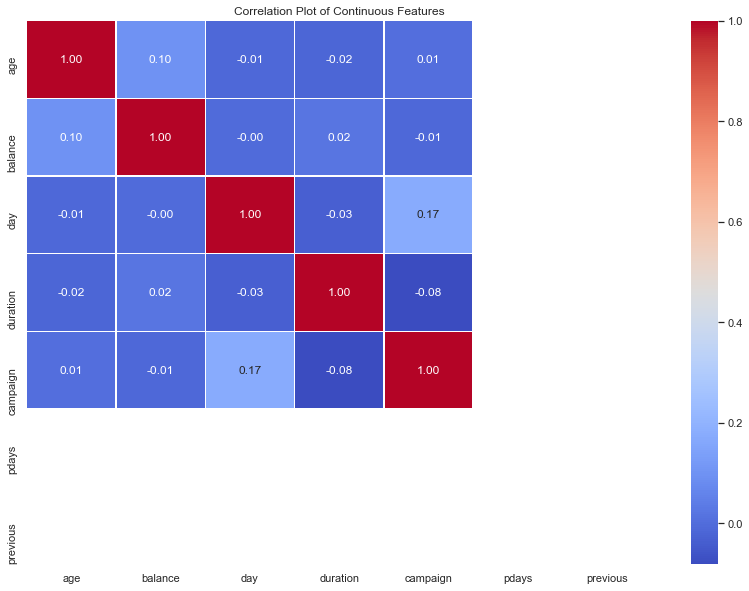

In [83]:
# Select continuous features
continuous_features = df2.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df2[continuous_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14,10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title("Correlation Plot of Continuous Features")

# Show the plot
plt.show()

> * Considering the loss of attributes and data (from the above) we shall not try to remove outliers.

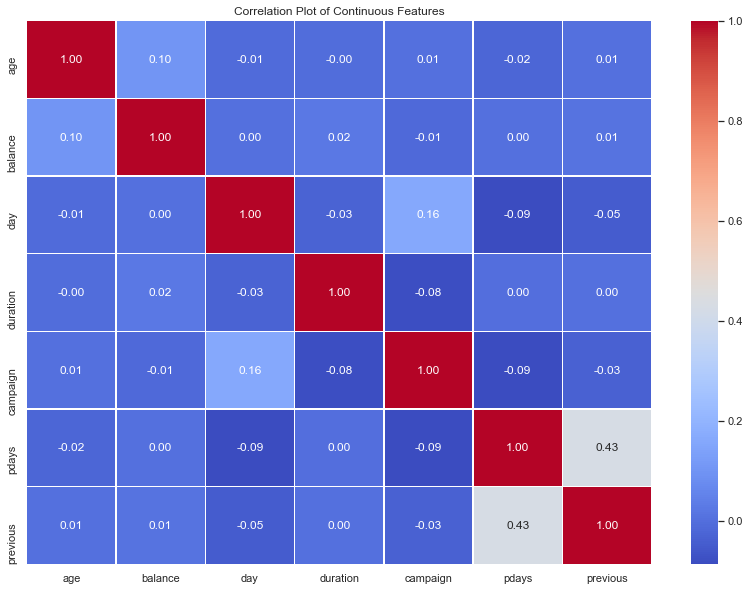

In [85]:
# Select continuous features
continuous_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[continuous_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14,10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title("Correlation Plot of Continuous Features")

# Show the plot
plt.show()

* No two featuers are strongly correlated to each other

> In a classification problem, checking the balance of target values is essential to understand if the dataset is imbalanced, as it can impact the performance of the machine learning model. 

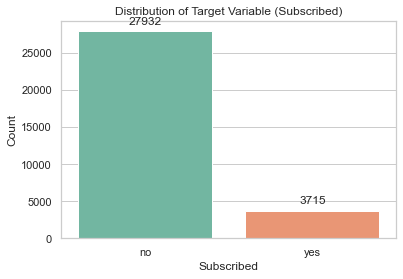

Target Value Counts:
no     27932
yes     3715
Name: subscribed, dtype: int64


In [87]:
# Count the occurrences of each unique value in the target variable
target_counts = df['subscribed'].value_counts()

# Plot the distribution of target values
plt.figure(figsize=(6, 4))
sns.countplot(x='subscribed', data=df, palette="Set2")
plt.title('Distribution of Target Variable (Subscribed)')
plt.xlabel('Subscribed')
plt.ylabel('Count')

# Annotate the bar plot with count values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

# Display the count of each unique value in the target variable
print("Target Value Counts:")
print(target_counts)

In [88]:
#Normalizing the'Subscribed' variable
df['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [89]:
# Changing'subscribed' yes/no to 1/0
df['subscribed'] = df['subscribed'].map({'no': 0, 'yes': 1})


* 'Contact' is not relevent for our model building so we will drop it.

In [90]:
df = df.drop(['contact'], axis=1)

> ## Modeling

In [91]:
y = df['subscribed']
X = df.drop('subscribed', axis=1)

In [92]:
#generating dummy values on the train dataset
X = pd.get_dummies(df)
X.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
X.shape

(31647, 49)

> Splitting the data into train and validation.

After building the model we validate the data and then we test the model with df_train 

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

* Transforming the data

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
y = df['subscribed']
X = df.drop('subscribed', axis=1)

# Generating dummy values for categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract numerical and categorical feature names
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Apply MinMax scaling to numerical features
scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

# Now X_train and X_val contain both dummy variables and MinMax-scaled numerical features


In [98]:
# Finding the random state
def find_best_random_state(X, y, model, test_size=0.3, max_random_state=200):
    max_acc = 0
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        accuracy = accuracy_score(y_test, predictions)
        
        if accuracy > max_acc:
            max_acc = accuracy
            best_random_state = random_state

    return max_acc, best_random_state

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Initialize variables to store random state values
rfc_rs = dtc_rs = lr_rs = svm_rs = None

# Loop through each classifier
for classifier_name, classifier_instance in classifiers.items():
    best_accuracy, best_random_state = find_best_random_state(X, y, classifier_instance)
    print(f"Best accuracy for {classifier_name} is {best_accuracy} at random state {best_random_state}")
    
    # Assign the random state value to the respective variable
    if classifier_name == 'Random Forest':
        rfc_rs = best_random_state
    elif classifier_name == 'Decision Tree':
        dtc_rs = best_random_state
    elif classifier_name == 'Logistic Regression':
        lr_rs = best_random_state
    elif classifier_name == 'SVM':
        svm_rs = best_random_state

# Now you can use rfc_rs, dtc_rs, lr_rs, svm_rs in your train-test split for each classifier


Best accuracy for Logistic Regression is 0.9001579778830964 at random state 154
Best accuracy for Random Forest is 0.9080568720379147 at random state 59
Best accuracy for Decision Tree is 0.8784623486045287 at random state 72
Best accuracy for SVM is 0.8905739863085834 at random state 59


In [99]:
# Initialize classifiers with specified random states
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=lr_rs),
    'Random Forest': RandomForestClassifier(random_state=rfc_rs),
    'SVM': SVC(random_state=svm_rs),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=dtc_rs)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_val_pred = classifier.predict(X_val)
    
    # Calculate training and validation accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    
    report = classification_report(y_val, y_val_pred)  # Use class labels directly
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {accuracy_train:.2f}")
    print(f"Validation Accuracy: {accuracy_val:.2f}")
    print(report)
    print("-" * 50)

Classifier: Logistic Regression
Training Accuracy: 0.90
Validation Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5599
           1       0.65      0.34      0.45       731

    accuracy                           0.90      6330
   macro avg       0.78      0.66      0.70      6330
weighted avg       0.89      0.90      0.89      6330

--------------------------------------------------
Classifier: Random Forest
Training Accuracy: 1.00
Validation Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5599
           1       0.65      0.38      0.48       731

    accuracy                           0.90      6330
   macro avg       0.79      0.68      0.71      6330
weighted avg       0.89      0.90      0.89      6330

--------------------------------------------------
Classifier: SVM
Training Accuracy: 0.90
Validation Accuracy: 0.90
              precis

### So among the above "RandomForestClassifier" is best suitable model

> ## Hyper parameter Tuining

In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        'criterion':['gini', 'entropy'],
        'min_samples_split': [2, 5, 10, 15],
        'max_depth': [0, 10, 20],    
        'min_samples_leaf': [1, 2, 4, 8],  
        'random_state': [10, 50, 1000]
    }


In [103]:
GCV = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [10, 50, 1000]})

In [104]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'random_state': 1000}

In [107]:
from sklearn.model_selection import cross_val_score

best_tree = RandomForestClassifier(**GCV.best_params_)

# Perform cross-validation to calculate accuracy
accuracy_scores = cross_val_score(best_tree, X, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy from cross-validation
mean_accuracy = accuracy_scores.mean()

print("Mean accuracy for the best hyperparameters:", mean_accuracy)

Mean accuracy for the best hyperparameters: 0.9040350831212276


In [108]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_leaf': [1, 2, 4, 8],
    'random_state': [10, 50, 1000]
}

# Create the RandomForestClassifier
clf = RandomForestClassifier()

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Perform the Randomized Search
random_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)

Best hyperparameters:  {'random_state': 10, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'gini'}
Best accuracy:  0.9043193883967005


In [111]:
# Define a RandomForestClassifier with GridSearchCV hyperparameters
best_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=1000
)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
pred = best_model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.35%


> Pickle file

In [112]:
import pickle

# Specify the file path where you want to save the model
file_path = "Bank_marketing_random_forest_model.pkl"

model = RandomForestClassifier()

# Save the model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(best_model, file)

In [119]:
with open('Bank_marketing_random_forest_model.pkl', 'rb') as file:
    trained_model = pickle.load(file)

In [127]:
df_test =pd.read_csv('termdeposit_test.csv')

In [128]:
df_test = df_test.drop(['contact'], axis=1)
df_test = df_test.drop(['ID'], axis=1)

In [130]:
#generating dummy values on the test dataset
df_test= pd.get_dummies(df_test)
df_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,78,2787,1,372,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,-705,3,111,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [131]:
predictions = trained_model.predict(df_test)

In [137]:
final_output= pd.DataFrame(predictions, columns = ['subscribed'])
final_output

,subscribed
0,0
1,1
2,1
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,1


In [138]:
# Changing'subscribed' yes/no to 1/0
final_output['subscribed'] = final_output['subscribed'].map({0:'no', 1:'yes'})
final_output

,subscribed
0,no
1,yes
2,yes
3,no
4,no
...,...
13559,no
13560,no
13561,no
13562,yes


In [139]:
final_output.to_csv("Subscribed_Final_out.csv")